# Image stacking, summing, median.

Images of M13 taken with a 10 inch telescope.

This dataset is downloaded from the astropy.stsci.edu server.

Import numpy, matplotlib, pyplot, download_file, fits

Download 5 files using 'download_file',  print the names of the downloaded files.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.utils.data import download_file
from astropy.io import fits
image_list = [ download_file('http://data.astropy.org/tutorials/FITS-images/M13_blue_000'+n+'.fits', cache=True ) \
              for n in ['1','2','3','4','5'] ]
for im_name in image_list:
    print(im_name)

/Users/rhamilton/.astropy/cache/download/py3/12441050c51cbbac316d379f0c4ba71a
/Users/rhamilton/.astropy/cache/download/py3/767f6191130dd093b2cd0d9357be416b
/Users/rhamilton/.astropy/cache/download/py3/220b1cb851fc0ade82bed89d4b127de3
/Users/rhamilton/.astropy/cache/download/py3/71137f295cebe59f2aef7eb13b249937
/Users/rhamilton/.astropy/cache/download/py3/6ad287e17c26a897c6819136dca825db


Create a list containing the 5 data sets.

Also create a 'final_image' containing zeros that is the same shape as our downloaded files.

Sum the 5 images into the 'final_image' and divide by 5 to get an average.

Print the mean value of the final image.

In [3]:
image_concat = []
for image in image_list:
    image_concat.append(fits.getdata(image))
    
    final_image = np.zeros(shape=image_concat[0].shape)

for image in image_concat:
    final_image += image
    
final_image = final_image/5.0
print(np.mean(final_image))

508.99287646441195


Plot each of the 5 input images to we what we are working with.

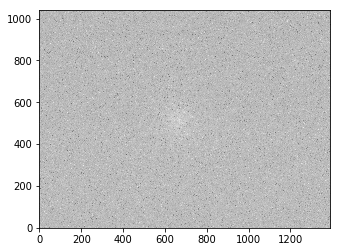

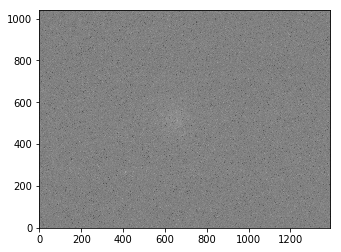

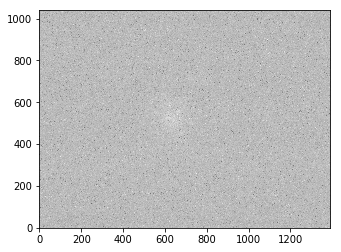

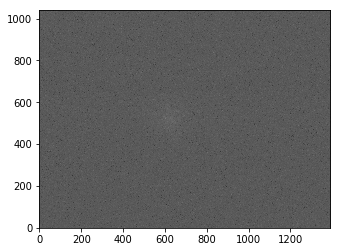

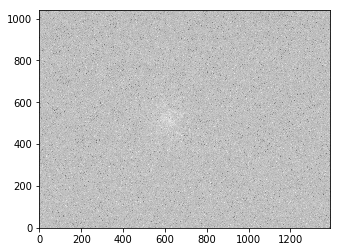

<Figure size 432x288 with 0 Axes>

In [4]:
for image in image_list:
    plt.imshow(fits.getdata(image), cmap='gray', origin="lower")
    plt.figure()

Plot a histogram of this average image.

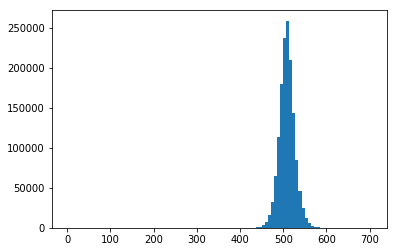

In [5]:
image_hist = plt.hist(final_image.flatten(), 100)

Plot the final, average image using a larger size figure and with min and max set from the histogram.

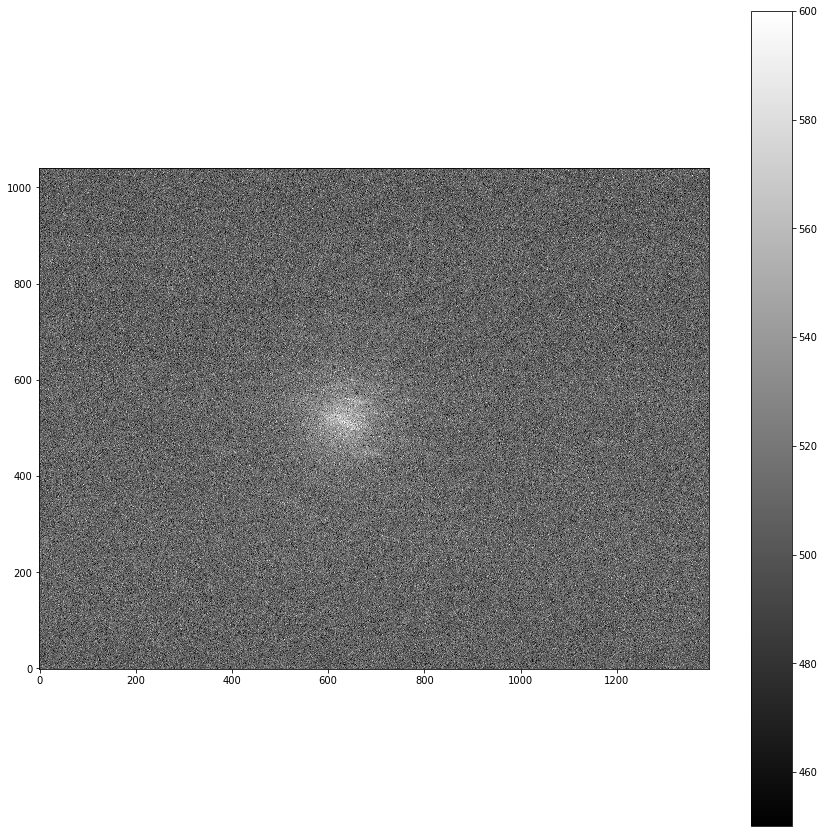

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(final_image, cmap='gray', origin='lower',vmin=450, vmax=600)
plt.colorbar()

Next, we use numpy to construct a 3D data cube out of the 5 images.

Then we make an image consisting of the median value of each pixel by running median on axis=2.

(1040, 1392, 5)


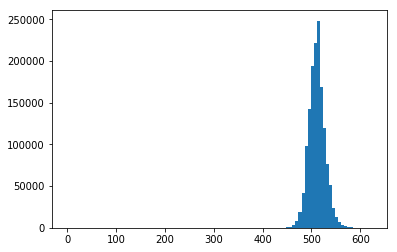

In [7]:
stack = np.dstack(image_concat)
print(stack.shape)
med_data = np.median(stack, axis=2)
med_hist = plt.hist(med_data.flatten(), 100)

Plot this median image the same way we did the average image for comparison.

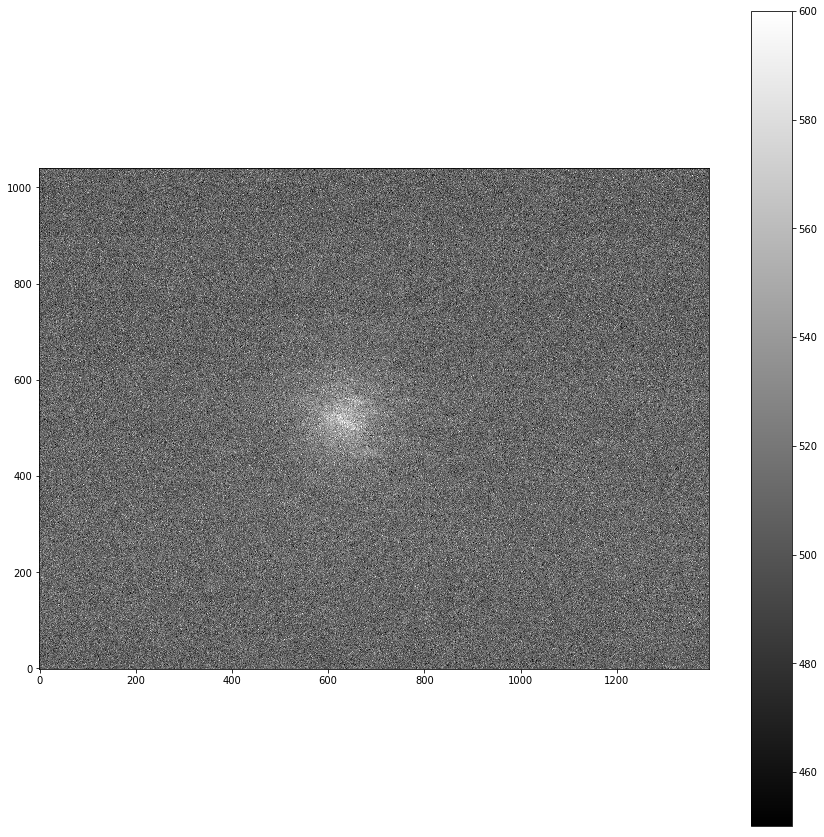

In [8]:
plt.figure(figsize=(15,15))
plt.imshow(med_data, cmap='gray', origin = 'lower', vmin=450, vmax=600)
plt.colorbar()

Show how we can write the average image out to disk.

In [9]:
outfile = 'stacked_M13_blue.fits'

hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)
